In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
data = pd.read_csv('/content/dataset_without_duplicate.csv')
data.shape

(2281, 15)

In [34]:
data = data.dropna(subset=['clean_text'])
data = data.reset_index(drop=True)

In [35]:
data['clean_text']

0                  nunggu ber jam hingga aplikasi terbuka
1                                          min jawab skip
2       min sinyal by tidak stabil hp nokia pluslokasi...
3             teman gila tingkah gila kumpul kepomasa sih
4                     mengadopsi bebas aktif nomor hahaha
                              ...                        
2201                                  admin settingan apn
2202           jahat banget nyuruh istirahat duluan malam
2203                                          selamat kak
2204                 niat bikin provider gaksi anjg emosi
2205             sih monthiversary giniii buseh kalah doi
Name: clean_text, Length: 2206, dtype: object

In [47]:
df = data[data['label'].notnull()]
df

,id,created_at,source,label,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,1.48E+18,Wed Jan 05 03:09:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id apa aku harus nunggu ber-jam² hingga a...,nunggu ber jam hingga aplikasi terbuka,in,0,0,rickjak16,FALSE,NaN,byu_id,Planet Namex,NaN
1,1.48E+18,Wed Jan 05 02:59:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,Min @byu_id tolong jawab lah. Jangan di skip.,min jawab skip,in,0,0,Oghee_1900,NaN,NaN,byu_id,"DKI Jakarta, Indonesia",NaN
2,1.48E+18,Wed Jan 05 02:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id min beberapa hari belakangan ini kok s...,min sinyal by tidak stabil hp nokia pluslokasi...,in,0,0,Andi_Pi14,NaN,NaN,byu_id,Indonesia,NaN
3,1.48E+18,Wed Jan 05 02:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,ada\n(selalu ada buat teman)\ngokil\n(tingkah ...,teman gila tingkah gila kumpul kepomasa sih,in,0,0,AlRob1179,NaN,NaN,byu_id,"Medan Timur, Indonesia",NaN
4,1.48E+18,Wed Jan 05 02:34:54 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,@SpeciaIONEe @worksfess @IndosatCare @triindon...,mengadopsi bebas aktif nomor hahaha,in,0,0,bangvalash,NaN,NaN,"SpeciaIONEe, worksfess, IndosatCare, triindone...","Mars, PA",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1.48E+18,Mon Jan 03 06:36:10 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",negatif,@fintaixx @byu_id SAMAA WOYY,samaa woyy,in,0,0,cumaorangasing,NaN,NaN,"fintaixx, byu_id",NaN,NaN
287,1.48E+18,Mon Jan 03 06:23:22 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",positif,"@byu_id\nSelamat siang, perkenalkan saya Taris...",siang perkenalkan tarisa auriel ukm sport poli...,in,0,0,x0x0kyungsoo,NaN,NaN,byu_id,she/her,NaN
288,1.48E+18,Mon Jan 03 06:00:41 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id G usah tanya mau ngapain.kamu tingkatk...,tidak perlu sedang apa tingkatkan pelayanan ma...,in,0,0,santoso_4215,NaN,NaN,byu_id,NaN,NaN
289,1.48E+18,Mon Jan 03 05:58:56 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,halo @byu_id kartu by u ku hilang. apa bisa pa...,halo kartu by ku hilang pakai kartu,in,0,0,dhitatias,NaN,NaN,byu_id,"ÜT: -6.2536145,106.5182546",NaN


In [48]:
df['label'].value_counts()

negatif    130
netral     100
positif     61
Name: label, dtype: int64

In [51]:
x = df['clean_text']
y = df['label']

In [58]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 24.5 MB/s 


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=0.2, stratify=y)


In [69]:
stp = StopWordRemoverFactory().get_stop_words()
vect = CountVectorizer()

In [70]:
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

In [71]:
# training naive bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [78]:
# training xgboost
import xgboost as xgb
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train_vec, y_train)

XGBClassifier(objective='multi:softprob')

In [83]:
# training xgboost
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)

RandomForestClassifier()

In [84]:
# evaluasi
y_pred = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred))


# evaluasi
y_pred_xgb = xgboost.predict(X_test_vec)
print(classification_report(y_test, y_pred_xgb))

# evaluasi
y_pred_rf = rf.predict(X_test_vec)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

     negatif       0.63      0.92      0.75        26
      netral       0.67      0.50      0.57        20
     positif       1.00      0.46      0.63        13

    accuracy                           0.68        59
   macro avg       0.77      0.63      0.65        59
weighted avg       0.72      0.68      0.66        59

              precision    recall  f1-score   support

     negatif       0.67      0.77      0.71        26
      netral       0.52      0.55      0.54        20
     positif       0.75      0.46      0.57        13

    accuracy                           0.63        59
   macro avg       0.65      0.59      0.61        59
weighted avg       0.64      0.63      0.62        59

              precision    recall  f1-score   support

     negatif       0.76      0.62      0.68        26
      netral       0.47      0.70      0.56        20
     positif       0.75      0.46      0.57        13

    accuracy        

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [86]:
df.label = df.label.map({"netral" : 0, "positif": 1, "negatif":2})

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [87]:
df.label.value_counts()

2    130
0    100
1     61
Name: label, dtype: int64

In [88]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [89]:
# get ready for target
from tensorflow.keras.utils import to_categorical

X_train, y_train = train_df.clean_text, train_df.label
X_test, y_test = test_df.clean_text, test_df.label

def prepare_target(y_train, y_test):
  y_train_enc = to_categorical(y_train)
  y_test_enc = to_categorical(y_test)
  return y_train_enc, y_test_enc

y_train, y_test = prepare_target(y_train, y_test)

In [90]:
# split train-val
train_sent1, val_sent1, train_labels1, val_labels1 = train_test_split(X_train1.to_numpy(),
                                                                   y_train1,
                                                                   test_size=0.2)

In [91]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [92]:
# setup text vect
max_vocab_length = 4000
max_length = 15

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length)

In [93]:
# vektorisasi teks
text_vectorization.adapt(train_sent)

In [ ]:
# split train-val
train_sent1, val_sent1, train_labels1, val_labels1 = train_test_split(X_train1.to_numpy(),
                                                                   y_train1,
                                                                   test_size=0.2)
# vektorisasi teks
text_vectorization.adapt(train_sent1)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

# fc NN

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_nlp_fc')

# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_hist = model_1.fit(train_sent1,
                           train_labels1,
                           epochs=40,
                           validation_data=(val_sent1, val_labels1))

In [94]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [95]:
# fc NN

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_nlp_fc')

In [96]:
# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [99]:
model_1_hist = model_1.fit(train_sent,
                           train_labels,
                           epochs=40,
                           validation_data=(val_sent, val_labels))

Epoch 1/40
6/6 [==============================] - 0s 16ms/step - loss: 0.5221 - accuracy: 0.8865 - val_loss: 0.8548 - val_accuracy: 0.5532
Epoch 2/40
6/6 [==============================] - 0s 11ms/step - loss: 0.5046 - accuracy: 0.9027 - val_loss: 0.8451 - val_accuracy: 0.5532
Epoch 3/40
6/6 [==============================] - 0s 10ms/step - loss: 0.4879 - accuracy: 0.9405 - val_loss: 0.8358 - val_accuracy: 0.5532
Epoch 4/40
6/6 [==============================] - 0s 11ms/step - loss: 0.4723 - accuracy: 0.9459 - val_loss: 0.8245 - val_accuracy: 0.6170
Epoch 5/40
6/6 [==============================] - 0s 10ms/step - loss: 0.4571 - accuracy: 0.9459 - val_loss: 0.8130 - val_accuracy: 0.6170
Epoch 6/40
6/6 [==============================] - 0s 11ms/step - loss: 0.4419 - accuracy: 0.9459 - val_loss: 0.8037 - val_accuracy: 0.5957
Epoch 7/40
6/6 [==============================] - 0s 10ms/step - loss: 0.4274 - accuracy: 0.9622 - val_loss: 0.7956 - val_accuracy: 0.6170
Epoch 8/40
6/6 [===========

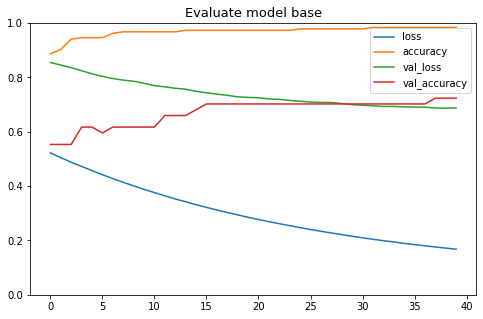

In [100]:
# Create plot of history model
import matplotlib.pyplot as plt


pd.DataFrame(model_1_hist.history).plot(figsize=(8, 5))
plt.title('Evaluate model base', fontsize=13)
plt.gca().set_ylim(0, 1)
plt.show()

In [106]:
data['label'][:291]

0      negatif
1      negatif
2      negatif
3       netral
4       netral
        ...   
286    negatif
287    positif
288    negatif
289    negatif
290     netral
Name: label, Length: 291, dtype: object

In [110]:
y_predict = model_1.predict(data['clean_text'][291:391])
y_predict.argmax(axis=1)

array([0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

In [ ]:
y_predict = model_1.predict(data['clean_text'][291:391])
y_predict.argmax(axis=1)

pred = pd.DataFrame(y_predict.argmax(axis=1), columns={0 : 'data'})
pred = pred.rename({0 : 'label'}, axis=1)

pred.label = pred.label.map({0:"netral", 1:"positif", 2:"negatif"})
pred

In [126]:
pred = pd.DataFrame(y_predict.argmax(axis=1), columns={0 : 'data'})
pred = pred.rename({0 : 'label'}, axis=1)

pred.label = pred.label.map({0:"netral", 1:"positif", 2:"negatif"})


data['label'][291:391] = pred['label']
data.to_csv('data0till291.csv')

,label
0,netral
1,negatif
2,negatif
3,netral
4,negatif
...,...
95,netral
96,negatif
97,negatif
98,negatif


In [132]:
data['label'][291:391] = pred['label']
data.to_csv('data0till291.csv')

In [133]:
data[291:391]

,id,created_at,source,label,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
291,1.48E+18,Mon Jan 03 05:55:52 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,@byu_id Dm dibaca min! Masa dri kmren disuruh ...,pesan dibaca min kmren disuruh tunggu,in,0,0,Deleleeet,NaN,NaN,byu_id,NaN,NaN
292,1.48E+18,Mon Jan 03 05:54:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,"@iotobing @byu_id Udah dm, chat live ujung""nya...",pesan chat live ujung nya suruh nunggu tidak d...,in,0,0,Deleleeet,NaN,NaN,"iotobing, byu_id",NaN,NaN
293,1.48E+18,Mon Jan 03 05:49:11 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id Gmna tiap beli quota succes d linkaja....,gmna beli quota succes linkaja quota tidak ada...,in,0,0,santoso_4215,NaN,NaN,byu_id,NaN,NaN
294,1.48E+18,Mon Jan 03 05:25:01 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,@byu_id Min DM ku gak direspon kie pie to karepe?,min pesan ku tidak direspon kie pie to karepe,in,0,0,dhumunkchubyto,NaN,NaN,byu_id,NaN,NaN
295,1.48E+18,Mon Jan 03 04:46:58 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,byu skrg lemot parahhh payah bgt @byu_id,byu lambat parahhh payah,in,0,0,gorengkrispyy,NaN,NaN,byu_id,cgk,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1.48E+18,Sun Jan 02 11:59:01 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,cek dm @byu_id,cek pesan,tr,0,0,ustadjongho,NaN,NaN,byu_id,NaN,NaN
387,1.48E+18,Sun Jan 02 11:47:55 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",negatif,@fintaixx @byu_id Dah pake jaringan byunya belum?,pakai jaringan byunya,in,0,0,kiiokooi,NaN,NaN,"fintaixx, byu_id","Bali, Indonesia",NaN
388,1.48E+18,Sun Jan 02 11:42:31 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id Mana titik-titik nya min?,titik titik nya min,in,0,0,syahid_zikri,NaN,NaN,byu_id,Jakarta - Tangerang PP,NaN
389,1.48E+18,Sun Jan 02 11:35:03 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,Sumpah @byu_id ngeselin banget sinyal nya har...,sumpah ngeselin banget sinyal nya,in,0,0,Spassi__,NaN,NaN,byu_id,NaN,NaN


Next Data 291

In [149]:
data_1 = pd.read_csv('/content/data0till291_checked.csv')
data_1.shape

(2206, 16)

In [150]:
x_1 = data_1['clean_text']
y_1 = data_1['label']

In [157]:
data_1['label'][:391] = data_1['label'][:391].map({"netral" : 0, "positif": 1, "negatif":2})
data_1['label'][:391]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      2
1      2
2      2
3      0
4      0
      ..
386    0
387    2
388    2
389    2
390    0
Name: label, Length: 391, dtype: object

In [158]:
train_df1, test_df1 = train_test_split(data_1[:291], test_size=0.2)

In [159]:
# get ready for target
from tensorflow.keras.utils import to_categorical

X_train1, y_train1 = train_df1.clean_text, train_df1.label
X_test1, y_test1 = test_df1.clean_text, test_df1.label

def prepare_target(y_train1, y_test1):
  y_train_enc1 = to_categorical(y_train1)
  y_test_enc1 = to_categorical(y_test1)
  return y_train_enc1, y_test_enc1

y_train1, y_test1 = prepare_target(y_train1, y_test1)

In [145]:
data_1[:391]

,Unnamed: 0,id,created_at,source,label,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,0,1.48E+18,Wed Jan 05 03:09:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id apa aku harus nunggu ber-jam² hingga a...,nunggu ber jam hingga aplikasi terbuka,in,0,0,rickjak16,FALSE,NaN,byu_id,Planet Namex,NaN
1,1,1.48E+18,Wed Jan 05 02:59:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,Min @byu_id tolong jawab lah. Jangan di skip.,min jawab skip,in,0,0,Oghee_1900,NaN,NaN,byu_id,"DKI Jakarta, Indonesia",NaN
2,2,1.48E+18,Wed Jan 05 02:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id min beberapa hari belakangan ini kok s...,min sinyal by tidak stabil hp nokia pluslokasi...,in,0,0,Andi_Pi14,NaN,NaN,byu_id,Indonesia,NaN
3,3,1.48E+18,Wed Jan 05 02:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,ada\n(selalu ada buat teman)\ngokil\n(tingkah ...,teman gila tingkah gila kumpul kepomasa sih,in,0,0,AlRob1179,NaN,NaN,byu_id,"Medan Timur, Indonesia",NaN
4,4,1.48E+18,Wed Jan 05 02:34:54 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,@SpeciaIONEe @worksfess @IndosatCare @triindon...,mengadopsi bebas aktif nomor hahaha,in,0,0,bangvalash,NaN,NaN,"SpeciaIONEe, worksfess, IndosatCare, triindone...","Mars, PA",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,1.48E+18,Sun Jan 02 11:59:01 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,cek dm @byu_id,cek pesan,tr,0,0,ustadjongho,NaN,NaN,byu_id,NaN,NaN
387,387,1.48E+18,Sun Jan 02 11:47:55 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",negatif,@fintaixx @byu_id Dah pake jaringan byunya belum?,pakai jaringan byunya,in,0,0,kiiokooi,NaN,NaN,"fintaixx, byu_id","Bali, Indonesia",NaN
388,388,1.48E+18,Sun Jan 02 11:42:31 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id Mana titik-titik nya min?,titik titik nya min,in,0,0,syahid_zikri,NaN,NaN,byu_id,Jakarta - Tangerang PP,NaN
389,389,1.48E+18,Sun Jan 02 11:35:03 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,Sumpah @byu_id ngeselin banget sinyal nya har...,sumpah ngeselin banget sinyal nya,in,0,0,Spassi__,NaN,NaN,byu_id,NaN,NaN


In [162]:
# split train-val
train_sent1, val_sent1, train_labels1, val_labels1 = train_test_split(X_train1.to_numpy(),
                                                                   y_train1,
                                                                   test_size=0.2)
# vektorisasi teks
text_vectorization.adapt(train_sent1)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

# fc NN

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_nlp_fc')

# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_hist = model_1.fit(train_sent1,
                           train_labels1,
                           epochs=40,
                           validation_data=(val_sent1, val_labels1))

Epoch 1/40
6/6 [==============================] - 1s 46ms/step - loss: 1.0925 - accuracy: 0.4757 - val_loss: 1.0921 - val_accuracy: 0.4681
Epoch 2/40
6/6 [==============================] - 0s 11ms/step - loss: 1.0693 - accuracy: 0.5946 - val_loss: 1.0858 - val_accuracy: 0.4681
Epoch 3/40
6/6 [==============================] - 0s 11ms/step - loss: 1.0503 - accuracy: 0.6054 - val_loss: 1.0802 - val_accuracy: 0.4681
Epoch 4/40
6/6 [==============================] - 0s 11ms/step - loss: 1.0294 - accuracy: 0.6108 - val_loss: 1.0754 - val_accuracy: 0.4681
Epoch 5/40
6/6 [==============================] - 0s 10ms/step - loss: 1.0093 - accuracy: 0.6108 - val_loss: 1.0706 - val_accuracy: 0.4681
Epoch 6/40
6/6 [==============================] - 0s 11ms/step - loss: 0.9893 - accuracy: 0.6108 - val_loss: 1.0656 - val_accuracy: 0.4681
Epoch 7/40
6/6 [==============================] - 0s 11ms/step - loss: 0.9678 - accuracy: 0.6162 - val_loss: 1.0601 - val_accuracy: 0.4681
Epoch 8/40
6/6 [===========

In [165]:
y_predict = model_1.predict(data_1['clean_text'][391:891])
y_predict.argmax(axis=1)

pred = pd.DataFrame(y_predict.argmax(axis=1), columns={0 : 'data'})
pred = pred.rename({0 : 'label'}, axis=1)

pred.label = pred.label.map({0:"netral", 1:"positif", 2:"negatif"})


data_1['label'][391:891] = pred['label']
data_1.to_csv('data0till891.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Next 891 till 1891

In [172]:
data_2 = pd.read_csv('/content/data0till891_checked.csv')
data_2

,id,created_at,source,label,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,1.48E+18,Wed Jan 05 03:09:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id apa aku harus nunggu ber-jam² hingga a...,nunggu ber jam hingga aplikasi terbuka,in,0,0,rickjak16,FALSE,NaN,byu_id,Planet Namex,NaN
1,1.48E+18,Wed Jan 05 02:59:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,Min @byu_id tolong jawab lah. Jangan di skip.,min jawab skip,in,0,0,Oghee_1900,NaN,NaN,byu_id,"DKI Jakarta, Indonesia",NaN
2,1.48E+18,Wed Jan 05 02:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id min beberapa hari belakangan ini kok s...,min sinyal by tidak stabil hp nokia pluslokasi...,in,0,0,Andi_Pi14,NaN,NaN,byu_id,Indonesia,NaN
3,1.48E+18,Wed Jan 05 02:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,ada\n(selalu ada buat teman)\ngokil\n(tingkah ...,teman gila tingkah gila kumpul kepomasa sih,in,0,0,AlRob1179,NaN,NaN,byu_id,"Medan Timur, Indonesia",NaN
4,1.48E+18,Wed Jan 05 02:34:54 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,@SpeciaIONEe @worksfess @IndosatCare @triindon...,mengadopsi bebas aktif nomor hahaha,in,0,0,bangvalash,NaN,NaN,"SpeciaIONEe, worksfess, IndosatCare, triindone...","Mars, PA",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,1.48E+18,Wed Jan 05 03:29:37 +0000 2022,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",NaN,@byu_id min minta settingan APN dong,admin settingan apn,in,0,0,ErwinAvrio,NaN,NaN,byu_id,NaN,NaN
2202,1.48E+18,Fri Dec 31 16:16:30 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,jahat banget kamu nyuruh aku istirahat duluan ...,jahat banget nyuruh istirahat duluan malam,in,0,0,rmd_azhari,NaN,NaN,byu_id,NaN,NaN
2203,1.48E+18,Thu Dec 30 05:15:39 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",NaN,Selamat tiga bulan bersama kak:) https://t.co/...,selamat kak,in,6,0,byu_id,FALSE,NaN,NaN,Indonesia,NaN
2204,1.48E+18,Thu Dec 30 04:12:01 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",NaN,LU NIAT BIKIN PROVIDER GAKSI ANJG EMOSI @byu_id,niat bikin provider gaksi anjg emosi,in,0,0,maruk0chann,NaN,NaN,byu_id,┊͙ ˘͈ᵕ˘͈,NaN


In [173]:
data_2['label'][:891] = data_2['label'][:891].map({"netral" : 0, "positif": 1, "negatif":2})
data_2['label'][:891]

0      2
1      2
2      2
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    2
Name: label, Length: 891, dtype: object

In [174]:
train_df1, test_df1 = train_test_split(data_2[:891], test_size=0.2)

In [175]:
# get ready for target
from tensorflow.keras.utils import to_categorical

X_train1, y_train1 = train_df1.clean_text, train_df1.label
X_test1, y_test1 = test_df1.clean_text, test_df1.label

def prepare_target(y_train1, y_test1):
  y_train_enc1 = to_categorical(y_train1)
  y_test_enc1 = to_categorical(y_test1)
  return y_train_enc1, y_test_enc1

y_train1, y_test1 = prepare_target(y_train1, y_test1)

In [177]:
y_train1

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [178]:
# split train-val
train_sent1, val_sent1, train_labels1, val_labels1 = train_test_split(X_train1.to_numpy(),
                                                                   y_train1,
                                                                   test_size=0.2)
# vektorisasi teks
text_vectorization.adapt(train_sent1)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

# fc NN

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_nlp_fc')

# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_hist = model_1.fit(train_sent1,
                           train_labels1,
                           epochs=40,
                           validation_data=(val_sent1, val_labels1))

Epoch 1/40
18/18 [==============================] - 1s 18ms/step - loss: 1.0642 - accuracy: 0.5782 - val_loss: 1.0385 - val_accuracy: 0.5944
Epoch 2/40
18/18 [==============================] - 0s 7ms/step - loss: 1.0034 - accuracy: 0.5817 - val_loss: 0.9946 - val_accuracy: 0.5874
Epoch 3/40
18/18 [==============================] - 0s 7ms/step - loss: 0.9496 - accuracy: 0.5940 - val_loss: 0.9572 - val_accuracy: 0.6084
Epoch 4/40
18/18 [==============================] - 0s 7ms/step - loss: 0.8971 - accuracy: 0.6186 - val_loss: 0.9175 - val_accuracy: 0.6154
Epoch 5/40
18/18 [==============================] - 0s 8ms/step - loss: 0.8420 - accuracy: 0.6731 - val_loss: 0.8770 - val_accuracy: 0.6713
Epoch 6/40
18/18 [==============================] - 0s 8ms/step - loss: 0.7845 - accuracy: 0.7891 - val_loss: 0.8376 - val_accuracy: 0.7273
Epoch 7/40
18/18 [==============================] - 0s 7ms/step - loss: 0.7273 - accuracy: 0.7979 - val_loss: 0.7976 - val_accuracy: 0.7273
Epoch 8/40
18/18 [=

In [179]:
y_predict = model_1.predict(data_2['clean_text'][891:1891])
y_predict.argmax(axis=1)

pred = pd.DataFrame(y_predict.argmax(axis=1), columns={0 : 'data'})
pred = pred.rename({0 : 'label'}, axis=1)

pred.label = pred.label.map({0:"netral", 1:"positif", 2:"negatif"})


data_2['label'][891:1891] = pred['label']
data_2.to_csv('data0till_1891.csv')

Next 1891 till 2206

In [180]:
data_3 = pd.read_csv('/content/data0till_1891_checked.csv')
data_3

,id,created_at,source,label,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,1480000000000000000,Wed Jan 05 03:09:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id apa aku harus nunggu ber-jam² hingga a...,nunggu ber jam hingga aplikasi terbuka,in,0,0,rickjak16,FALSE,NaN,byu_id,Planet Namex,NaN
1,1480000000000000000,Wed Jan 05 02:59:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,Min @byu_id tolong jawab lah. Jangan di skip.,min jawab skip,in,0,0,Oghee_1900,NaN,NaN,byu_id,"DKI Jakarta, Indonesia",NaN
2,1480000000000000000,Wed Jan 05 02:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id min beberapa hari belakangan ini kok s...,min sinyal by tidak stabil hp nokia pluslokasi...,in,0,0,Andi_Pi14,NaN,NaN,byu_id,Indonesia,NaN
3,1480000000000000000,Wed Jan 05 02:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,ada\n(selalu ada buat teman)\ngokil\n(tingkah ...,teman gila tingkah gila kumpul kepomasa sih,in,0,0,AlRob1179,NaN,NaN,byu_id,"Medan Timur, Indonesia",NaN
4,1480000000000000000,Wed Jan 05 02:34:54 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,@SpeciaIONEe @worksfess @IndosatCare @triindon...,mengadopsi bebas aktif nomor hahaha,in,0,0,bangvalash,NaN,NaN,"SpeciaIONEe, worksfess, IndosatCare, triindone...","Mars, PA",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,1480000000000000000,Wed Jan 05 03:29:37 +0000 2022,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",NaN,@byu_id min minta settingan APN dong,admin settingan apn,in,0,0,ErwinAvrio,NaN,NaN,byu_id,NaN,NaN
2202,1480000000000000000,Fri Dec 31 16:16:30 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,jahat banget kamu nyuruh aku istirahat duluan ...,jahat banget nyuruh istirahat duluan malam,in,0,0,rmd_azhari,NaN,NaN,byu_id,NaN,NaN
2203,1480000000000000000,Thu Dec 30 05:15:39 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",NaN,Selamat tiga bulan bersama kak:) https://t.co/...,selamat kak,in,6,0,byu_id,FALSE,NaN,NaN,Indonesia,NaN
2204,1480000000000000000,Thu Dec 30 04:12:01 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",NaN,LU NIAT BIKIN PROVIDER GAKSI ANJG EMOSI @byu_id,niat bikin provider gaksi anjg emosi,in,0,0,maruk0chann,NaN,NaN,byu_id,┊͙ ˘͈ᵕ˘͈,NaN


In [182]:
data_3['label'][:1891] = data_3['label'][:1891].map({"netral" : 0, "positif": 1, "negatif":2})
data_3['label'][:1891]

0       2
1       2
2       2
3       0
4       0
       ..
1886    0
1887    0
1888    2
1889    2
1890    0
Name: label, Length: 1891, dtype: object

In [183]:
train_df1, test_df1 = train_test_split(data_3[:1891], test_size=0.2)

In [184]:
# get ready for target
from tensorflow.keras.utils import to_categorical

X_train1, y_train1 = train_df1.clean_text, train_df1.label
X_test1, y_test1 = test_df1.clean_text, test_df1.label

def prepare_target(y_train1, y_test1):
  y_train_enc1 = to_categorical(y_train1)
  y_test_enc1 = to_categorical(y_test1)
  return y_train_enc1, y_test_enc1

y_train1, y_test1 = prepare_target(y_train1, y_test1)

In [185]:
# split train-val
train_sent1, val_sent1, train_labels1, val_labels1 = train_test_split(X_train1.to_numpy(),
                                                                   y_train1,
                                                                   test_size=0.2)
# vektorisasi teks
text_vectorization.adapt(train_sent1)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

# fc NN

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_nlp_fc')

# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_hist = model_1.fit(train_sent1,
                           train_labels1,
                           epochs=40,
                           validation_data=(val_sent1, val_labels1))

Epoch 1/40
38/38 [==============================] - 1s 11ms/step - loss: 1.0263 - accuracy: 0.5757 - val_loss: 0.9603 - val_accuracy: 0.5941
Epoch 2/40
38/38 [==============================] - 0s 7ms/step - loss: 0.8989 - accuracy: 0.5955 - val_loss: 0.8627 - val_accuracy: 0.6205
Epoch 3/40
38/38 [==============================] - 0s 6ms/step - loss: 0.7873 - accuracy: 0.7179 - val_loss: 0.7777 - val_accuracy: 0.7558
Epoch 4/40
38/38 [==============================] - 0s 6ms/step - loss: 0.6826 - accuracy: 0.8197 - val_loss: 0.7101 - val_accuracy: 0.7393
Epoch 5/40
38/38 [==============================] - 0s 7ms/step - loss: 0.5968 - accuracy: 0.8329 - val_loss: 0.6655 - val_accuracy: 0.7426
Epoch 6/40
38/38 [==============================] - 0s 6ms/step - loss: 0.5273 - accuracy: 0.8503 - val_loss: 0.6325 - val_accuracy: 0.7558
Epoch 7/40
38/38 [==============================] - 0s 6ms/step - loss: 0.4730 - accuracy: 0.8594 - val_loss: 0.6125 - val_accuracy: 0.7492
Epoch 8/40
38/38 [=

In [186]:
y_predict = model_1.predict(data_3['clean_text'][1891:])
y_predict.argmax(axis=1)

pred = pd.DataFrame(y_predict.argmax(axis=1), columns={0 : 'data'})
pred = pred.rename({0 : 'label'}, axis=1)

pred.label = pred.label.map({0:"netral", 1:"positif", 2:"negatif"})

data_3['label'][1891:] = pred['label']
data_3.to_csv('data0till_done.csv')